# LSTM and CNN-LSTM

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
parser = lambda x:pd.datetime.strptime(x, '%d-%b-%y' )
df = pd.read_csv("Agmarknet_Price_And_Arrival_Report_LKNW_20Yrs_new.csv", parse_dates=['date_arrival'],date_parser= parser)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,state_name,district_name,market_center_name,Variety,group_name,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),date_arrival
0,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,130.0,1620,1720,1670,2022-08-20
1,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,130.0,1640,1740,1690,2022-08-19
2,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,110.0,1640,1740,1690,2022-08-18
3,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,90.0,1640,1740,1690,2022-08-17
4,Uttar Pradesh,Lucknow,Lucknow,Desi,Vegetables,110.0,1610,1710,1660,2022-08-16
...,...,...,...,...,...,...,...,...,...,...
5667,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,360.0,0,545,160,2002-08-13
5668,Uttar Pradesh,Lucknow,Lucknow,Red,Vegetables,340.0,0,540,150,2002-08-12
5669,Uttar Pradesh,Lucknow,Lucknow,Local,Vegetables,340.0,0,555,160,2002-08-12
5670,Uttar Pradesh,Lucknow,Lucknow,Red,Vegetables,340.0,0,530,150,2002-08-09


In [ ]:
df.drop(columns=['state_name','district_name','market_center_name','group_name'],axis=1,  inplace=True)
df

,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),date_arrival
0,Desi,130.0,1620,1720,1670,2022-08-20
1,Desi,130.0,1640,1740,1690,2022-08-19
2,Desi,110.0,1640,1740,1690,2022-08-18
3,Desi,90.0,1640,1740,1690,2022-08-17
4,Desi,110.0,1610,1710,1660,2022-08-16
...,...,...,...,...,...,...
5667,Local,360.0,0,545,160,2002-08-13
5668,Red,340.0,0,540,150,2002-08-12
5669,Local,340.0,0,555,160,2002-08-12
5670,Red,340.0,0,530,150,2002-08-09


In [ ]:
# ## Sorting index to ascending order of date_arrival Col
df= df.iloc[::-1]
df

,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),date_arrival
5671,Local,340.0,0,545,160,2002-08-09
5670,Red,340.0,0,530,150,2002-08-09
5669,Local,340.0,0,555,160,2002-08-12
5668,Red,340.0,0,540,150,2002-08-12
5667,Local,360.0,0,545,160,2002-08-13
...,...,...,...,...,...,...
4,Desi,110.0,1610,1710,1660,2022-08-16
3,Desi,90.0,1640,1740,1690,2022-08-17
2,Desi,110.0,1640,1740,1690,2022-08-18
1,Desi,130.0,1640,1740,1690,2022-08-19


In [ ]:
df.describe()

,Arrival(Tonnes),MIN,MAX,MODAL(Per Q)
count,5672.000000,5672.000000,5672.000000,5672.000000
mean,147.935684,575.267278,883.482193,841.607017
std,137.014209,611.014877,519.569226,488.959581
min,3.500000,0.000000,0.000000,0.000000
25%,63.500000,0.000000,515.000000,500.000000
50%,103.000000,500.000000,745.000000,715.000000
75%,181.125000,1000.000000,1150.000000,1071.250000
max,1745.000000,3200.000000,4800.000000,4800.000000


In [ ]:
df.value_counts('MIN'),df.value_counts('MAX'),df.value_counts('MODAL(Per Q)')

(MIN
 0       2347
 1000     293
 500      210
 800      210
 600      205
         ... 
 1580       1
 520        1
 1625       1
 1675       1
 1110       1
 Length: 182, dtype: int64, MAX
 600     282
 700     210
 1200    205
 650     203
 1100    200
        ... 
 175       1
 1590      1
 1110      1
 170       1
 4800      1
 Length: 275, dtype: int64, MODAL(Per Q)
 500     202
 400     199
 600     196
 1100    186
 700     167
        ... 
 1760      1
 1720      1
 1540      1
 1535      1
 4800      1
 Length: 324, dtype: int64)

In [ ]:
df['MIN']=np.where(df['MIN']==0,df['MIN'].median(),df['MIN'])
df['MIN']

5671     500.0
5670     500.0
5669     500.0
5668     500.0
5667     500.0
         ...  
4       1610.0
3       1640.0
2       1640.0
1       1640.0
0       1620.0
Name: MIN, Length: 5672, dtype: float64

In [ ]:
df['MAX']=np.where(df['MAX']==0,df['MAX'].median(),df['MAX'])
df['MAX']

5671     545.0
5670     530.0
5669     555.0
5668     540.0
5667     545.0
         ...  
4       1710.0
3       1740.0
2       1740.0
1       1740.0
0       1720.0
Name: MAX, Length: 5672, dtype: float64

In [ ]:
df = df.set_index('date_arrival')
df

,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q)
date_arrival,,,,,
2002-08-09,Local,340.0,500.0,545.0,160
2002-08-09,Red,340.0,500.0,530.0,150
2002-08-12,Local,340.0,500.0,555.0,160
2002-08-12,Red,340.0,500.0,540.0,150
2002-08-13,Local,360.0,500.0,545.0,160
...,...,...,...,...,...
2022-08-16,Desi,110.0,1610.0,1710.0,1660
2022-08-17,Desi,90.0,1640.0,1740.0,1690
2022-08-18,Desi,110.0,1640.0,1740.0,1690


In [ ]:
parser1 = lambda x:pd.datetime.strptime(x, '%d/%m/%Y' )
df1 = pd.read_csv("LCKNW_Prcp_Temp_20yrs.csv", parse_dates=['date_arrival'],date_parser= parser1)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,date_arrival,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,2002-08-09,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,372.0,",,S",274.0,",,S",322,"H,,S"
1,2002-08-10,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,372.0,",,S",NaN,NaN,284,"H,,S"
2,2002-08-11,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,332.0,",,S",255.0,",,S",277,"H,,S"
3,2002-08-12,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,288.0,",,S",NaN,NaN,268,"H,,S"
4,2002-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",249.0,",,S",320.0,",,S",246.0,",,S",268,"H,,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,2022-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",NaN,NaN,360.0,",,S",NaN,NaN,309,"H,,S"
7297,2022-08-14,26.75,80.883,128,"LUCKNOW AMAUSI, IN",150.0,",,S",360.0,",,S",265.0,",,S",301,"H,,S"
7298,2022-08-15,26.75,80.883,128,"LUCKNOW AMAUSI, IN",5.0,",,S",342.0,",,S",NaN,NaN,281,"H,,S"
7299,2022-08-16,26.75,80.883,128,"LUCKNOW AMAUSI, IN",41.0,",,S",336.0,",,S",256.0,",,S",287,"H,,S"


In [ ]:
df1.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TMAX,TMIN,TAVG
count,7301.00,7.301000e+03,7301.0,2572.000000,5557.000000,5817.000000,7301.00000
mean,26.75,8.088300e+01,128.0,64.491835,322.459061,185.801444,252.61293
std,0.00,1.421183e-14,0.0,177.066134,63.480617,71.913840,67.34759
min,26.75,8.088300e+01,128.0,0.000000,110.000000,-7.000000,56.00000
25%,26.75,8.088300e+01,128.0,0.000000,280.000000,122.000000,196.00000
50%,26.75,8.088300e+01,128.0,0.000000,332.000000,204.000000,273.00000
75%,26.75,8.088300e+01,128.0,41.000000,364.000000,250.000000,304.00000
max,26.75,8.088300e+01,128.0,3612.000000,461.000000,318.000000,389.00000


In [ ]:
df1['TMAX'].isna().sum(), df1['TMIN'].isnull().sum()

(1744, 1484)

In [ ]:
df1['TMAX']=np.where(df1['TMAX']==0,df1['TMAX'].mean(),df1['TMAX'])
df1['TMAX']

0       372.0
1       372.0
2       332.0
3       288.0
4       320.0
        ...  
7296    360.0
7297    360.0
7298    342.0
7299    336.0
7300    350.0
Name: TMAX, Length: 7301, dtype: float64

In [ ]:
df1['TMAX']= df1['TMAX'].fillna(value=df1['TMAX'].mean()) #,inplace=True

df1['TMAX']

0       372.0
1       372.0
2       332.0
3       288.0
4       320.0
        ...  
7296    360.0
7297    360.0
7298    342.0
7299    336.0
7300    350.0
Name: TMAX, Length: 7301, dtype: float64

In [ ]:
df1['TMIN']=np.where(df1['TMIN']==0,df1['TMIN'].mean(),df1['TMIN'])
df1['TMIN']

0       274.0
1         NaN
2       255.0
3         NaN
4       246.0
        ...  
7296      NaN
7297    265.0
7298      NaN
7299    256.0
7300      NaN
Name: TMIN, Length: 7301, dtype: float64

In [ ]:
df1['TMIN']= df1['TMIN'].fillna(method='ffill')  #,inplace =True
df1['TMIN']

0       274.0
1       274.0
2       255.0
3       255.0
4       246.0
        ...  
7296    269.0
7297    265.0
7298    265.0
7299    256.0
7300    256.0
Name: TMIN, Length: 7301, dtype: float64

In [ ]:
df1['TMAX'].isna().sum(), df1['TMIN'].isna().sum()

(0, 0)

In [ ]:
## precipitation: fillna() with 0
df1['PRCP'].fillna(0,axis=0,inplace=True)
df1

,date_arrival,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,2002-08-09,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,372.0,",,S",274.0,",,S",322,"H,,S"
1,2002-08-10,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,372.0,",,S",274.0,NaN,284,"H,,S"
2,2002-08-11,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,332.0,",,S",255.0,",,S",277,"H,,S"
3,2002-08-12,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,288.0,",,S",255.0,NaN,268,"H,,S"
4,2002-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",249.0,",,S",320.0,",,S",246.0,",,S",268,"H,,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,2022-08-13,26.75,80.883,128,"LUCKNOW AMAUSI, IN",0.0,NaN,360.0,",,S",269.0,NaN,309,"H,,S"
7297,2022-08-14,26.75,80.883,128,"LUCKNOW AMAUSI, IN",150.0,",,S",360.0,",,S",265.0,",,S",301,"H,,S"
7298,2022-08-15,26.75,80.883,128,"LUCKNOW AMAUSI, IN",5.0,",,S",342.0,",,S",265.0,NaN,281,"H,,S"
7299,2022-08-16,26.75,80.883,128,"LUCKNOW AMAUSI, IN",41.0,",,S",336.0,",,S",256.0,",,S",287,"H,,S"


In [ ]:
df1.drop(columns=['LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME',
       'PRCP_ATTRIBUTES', 'TMAX_ATTRIBUTES','TMIN_ATTRIBUTES',
       'TAVG_ATTRIBUTES'],axis=1,  inplace=True)
df1

,date_arrival,PRCP,TMAX,TMIN,TAVG
0,2002-08-09,0.0,372.0,274.0,322
1,2002-08-10,0.0,372.0,274.0,284
2,2002-08-11,0.0,332.0,255.0,277
3,2002-08-12,0.0,288.0,255.0,268
4,2002-08-13,249.0,320.0,246.0,268
...,...,...,...,...,...
7296,2022-08-13,0.0,360.0,269.0,309
7297,2022-08-14,150.0,360.0,265.0,301
7298,2022-08-15,5.0,342.0,265.0,281
7299,2022-08-16,41.0,336.0,256.0,287


In [ ]:
# Merging both dataframes according to df1 col date_arrival
df2 = pd.merge(df, df1, on= 'date_arrival')
df2

,date_arrival,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG
0,2002-08-09,Local,340.0,500.0,545.0,160,0.0,372.0,274.0,322
1,2002-08-09,Red,340.0,500.0,530.0,150,0.0,372.0,274.0,322
2,2002-08-12,Local,340.0,500.0,555.0,160,0.0,288.0,255.0,268
3,2002-08-12,Red,340.0,500.0,540.0,150,0.0,288.0,255.0,268
4,2002-08-13,Local,360.0,500.0,545.0,160,249.0,320.0,246.0,268
...,...,...,...,...,...,...,...,...,...,...
5655,2022-08-12,Desi,110.0,1620.0,1730.0,1670,0.0,340.0,269.0,293
5656,2022-08-13,Desi,100.0,1610.0,1710.0,1660,0.0,360.0,269.0,309
5657,2022-08-14,Desi,70.0,1610.0,1710.0,1660,150.0,360.0,265.0,301
5658,2022-08-16,Desi,110.0,1610.0,1710.0,1660,41.0,336.0,256.0,287


In [ ]:
# remove dulpicate rows
df2.drop_duplicates(subset='date_arrival', inplace=True)
df2

,date_arrival,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG
0,2002-08-09,Local,340.0,500.0,545.0,160,0.0,372.0,274.0,322
2,2002-08-12,Local,340.0,500.0,555.0,160,0.0,288.0,255.0,268
4,2002-08-13,Local,360.0,500.0,545.0,160,249.0,320.0,246.0,268
6,2002-08-14,Local,390.0,500.0,540.0,160,239.0,322.0,244.0,284
8,2002-08-16,Local,240.0,500.0,540.0,160,0.0,360.0,262.0,312
...,...,...,...,...,...,...,...,...,...,...
5655,2022-08-12,Desi,110.0,1620.0,1730.0,1670,0.0,340.0,269.0,293
5656,2022-08-13,Desi,100.0,1610.0,1710.0,1660,0.0,360.0,269.0,309
5657,2022-08-14,Desi,70.0,1610.0,1710.0,1660,150.0,360.0,265.0,301
5658,2022-08-16,Desi,110.0,1610.0,1710.0,1660,41.0,336.0,256.0,287


In [ ]:
df2.columns

Index(['date_arrival', 'Variety', 'Arrival(Tonnes)', 'MIN', 'MAX',
       'MODAL(Per Q)', 'PRCP', 'TMAX', 'TMIN', 'TAVG'],
      dtype='object')

In [ ]:
df2['Variety'].value_counts()

Desi             True
Potato           True
Other            True
Red              True
Local           False
Chandermukhi    False
Name: Variety, dtype: bool

In [ ]:
variety = ['Desi','Potato','Other','Red','Chandermukhi']
df_final = df2.copy().loc[df2['Variety'].isin(variety)]
df_final

,date_arrival,Variety,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG
14,2003-01-23,Red,230.0,500.0,170.0,170,0.0,216.0,21.0,127
16,2003-01-24,Red,170.0,500.0,160.0,160,0.0,249.0,45.0,171
18,2003-01-25,Red,190.0,500.0,160.0,160,0.0,216.0,45.0,148
20,2003-01-27,Red,130.0,500.0,160.0,160,0.0,287.0,104.0,198
22,2003-01-28,Red,120.0,500.0,160.0,160,30.0,287.0,144.0,178
...,...,...,...,...,...,...,...,...,...,...
5655,2022-08-12,Desi,110.0,1620.0,1730.0,1670,0.0,340.0,269.0,293
5656,2022-08-13,Desi,100.0,1610.0,1710.0,1660,0.0,360.0,269.0,309
5657,2022-08-14,Desi,70.0,1610.0,1710.0,1660,150.0,360.0,265.0,301
5658,2022-08-16,Desi,110.0,1610.0,1710.0,1660,41.0,336.0,256.0,287


applying one hot encoding on variety col

In [ ]:
df_train = pd.get_dummies(data=df_final ,columns = ['Variety'])
df_train

,date_arrival,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG,Variety_Chandermukhi,Variety_Desi,Variety_Other,Variety_Potato,Variety_Red
14,2003-01-23,230.0,500.0,170.0,170,0.0,216.0,21.0,127,0,0,0,0,1
16,2003-01-24,170.0,500.0,160.0,160,0.0,249.0,45.0,171,0,0,0,0,1
18,2003-01-25,190.0,500.0,160.0,160,0.0,216.0,45.0,148,0,0,0,0,1
20,2003-01-27,130.0,500.0,160.0,160,0.0,287.0,104.0,198,0,0,0,0,1
22,2003-01-28,120.0,500.0,160.0,160,30.0,287.0,144.0,178,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,2022-08-12,110.0,1620.0,1730.0,1670,0.0,340.0,269.0,293,0,1,0,0,0
5656,2022-08-13,100.0,1610.0,1710.0,1660,0.0,360.0,269.0,309,0,1,0,0,0
5657,2022-08-14,70.0,1610.0,1710.0,1660,150.0,360.0,265.0,301,0,1,0,0,0
5658,2022-08-16,110.0,1610.0,1710.0,1660,41.0,336.0,256.0,287,0,1,0,0,0


data for validation to predict future prices of commodity

In [ ]:
df_train_to_val =df_train[:-30].copy()
df_validate= df_train[-30:].copy()

In [ ]:
df_train_to_val.shape, df_validate.shape

((5149, 14), (30, 14))

In [ ]:
training_dates = pd.to_datetime(df_train_to_val['date_arrival'])

In [ ]:
my_columns = list(df_train_to_val)[1:]
print(my_columns)

['Arrival(Tonnes)', 'MIN', 'MAX', 'MODAL(Per Q)', 'PRCP', 'TMAX', 'TMIN', 'TAVG', 'Variety_Chandermukhi', 'Variety_Desi', 'Variety_Other', 'Variety_Potato', 'Variety_Red']


In [ ]:
data_for_training =df_train_to_val[my_columns].astype(float)
data_for_training

,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG,Variety_Chandermukhi,Variety_Desi,Variety_Other,Variety_Potato,Variety_Red
14,230.0,500.0,170.0,170.0,0.0,216.0,21.0,127.0,0.0,0.0,0.0,0.0,1.0
16,170.0,500.0,160.0,160.0,0.0,249.0,45.0,171.0,0.0,0.0,0.0,0.0,1.0
18,190.0,500.0,160.0,160.0,0.0,216.0,45.0,148.0,0.0,0.0,0.0,0.0,1.0
20,130.0,500.0,160.0,160.0,0.0,287.0,104.0,198.0,0.0,0.0,0.0,0.0,1.0
22,120.0,500.0,160.0,160.0,30.0,287.0,144.0,178.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,90.0,1450.0,1550.0,1500.0,0.0,388.0,300.0,338.0,0.0,1.0,0.0,0.0,0.0
5626,80.0,1480.0,1580.0,1530.0,0.0,388.0,302.0,335.0,0.0,1.0,0.0,0.0,0.0
5627,60.0,1480.0,1590.0,1530.0,0.0,391.0,302.0,339.0,0.0,1.0,0.0,0.0,0.0
5628,70.0,1480.0,1580.0,1530.0,0.0,396.0,302.0,336.0,0.0,1.0,0.0,0.0,0.0


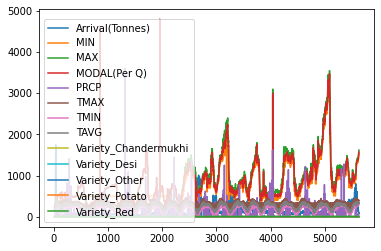

In [ ]:
data_for_training.plot()

## Using MinMax scaler to scale data

In [ ]:
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_training)

In [ ]:
scaled_data.shape

(5149, 13)

Reshaping the data for prediction

In [ ]:
train_X=[]
train_Y=[]

In [ ]:
n_future = 1    #change it and check forecasted values
n_past = 30    #lookbacks

for i in range(n_past, len(scaled_data)-n_future +1):
  train_X.append(scaled_data[i - n_past : i, 0:data_for_training.shape[1]])
  train_Y.append(scaled_data[i + n_future - 1: i + n_future,3])

In [ ]:
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [ ]:
train_X.shape ,  train_Y.shape   #has values 10 lesss than our original data

((5119, 30, 13), (5119, 1))

In [ ]:
scaled_data

array([[0.13006029, 0.10418049, 0.00322928, ..., 0.        , 0.        ,
        1.        ],
       [0.09560724, 0.10418049, 0.00107643, ..., 0.        , 0.        ,
        1.        ],
       [0.10709159, 0.10418049, 0.00107643, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.0324433 , 0.42932979, 0.30893434, ..., 0.        , 0.        ,
        0.        ],
       [0.03818547, 0.42932979, 0.30678149, ..., 0.        , 0.        ,
        0.        ],
       [0.04966982, 0.44260119, 0.3153929 , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
train_X

array([[[0.13006029, 0.10418049, 0.00322928, ..., 0.        ,
         0.        , 1.        ],
        [0.09560724, 0.10418049, 0.00107643, ..., 0.        ,
         0.        , 1.        ],
        [0.10709159, 0.10418049, 0.00107643, ..., 0.        ,
         0.        , 1.        ],
        ...,
        [0.055412  , 0.10418049, 0.07642626, ..., 0.        ,
         0.        , 1.        ],
        [0.05598622, 0.10418049, 0.07750269, ..., 0.        ,
         0.        , 1.        ],
        [0.05569911, 0.10418049, 0.07857912, ..., 0.        ,
         0.        , 1.        ]],

       [[0.09560724, 0.10418049, 0.00107643, ..., 0.        ,
         0.        , 1.        ],
        [0.10709159, 0.10418049, 0.00107643, ..., 0.        ,
         0.        , 1.        ],
        [0.07263853, 0.10418049, 0.00107643, ..., 0.        ,
         0.        , 1.        ],
        ...,
        [0.05598622, 0.10418049, 0.07750269, ..., 0.        ,
         0.        , 1.        ],
        [0.0

In [ ]:
train_Y

array([[0.10833333],
       [0.10833333],
       [0.10833333],
       ...,
       [0.31875   ],
       [0.31875   ],
       [0.32708333]])

Applying LSTM

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#Creating Model

In [ ]:
model3 = Sequential()
model3.add(LSTM(64, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model3.add(LSTM(64, activation='relu',return_sequences=False))
model3.add(Dropout(0.2))
model3.add(Dense(train_Y.shape[1]))

In [ ]:
model3.compile(optimizer =Adam(learning_rate=0.0001), loss='mse',metrics='acc')   #learning_rate>lr=.001

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            19968     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 53,057
Trainable params: 53,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model3.fit(train_X, train_Y, epochs=25, batch_size=30, validation_split=0.1, verbose=1)

Epoch 1/25
154/154 [==============================] - 14s 73ms/step - loss: 0.0128 - acc: 2.1706e-04 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 2/25
154/154 [==============================] - 11s 70ms/step - loss: 0.0034 - acc: 2.1706e-04 - val_loss: 3.9104e-04 - val_acc: 0.0000e+00
Epoch 3/25
154/154 [==============================] - 7s 47ms/step - loss: 0.0022 - acc: 2.1706e-04 - val_loss: 2.5046e-04 - val_acc: 0.0000e+00
Epoch 4/25
154/154 [==============================] - 5s 34ms/step - loss: 0.0019 - acc: 2.1706e-04 - val_loss: 2.2215e-04 - val_acc: 0.0000e+00
Epoch 5/25
154/154 [==============================] - 5s 34ms/step - loss: 0.0016 - acc: 2.1706e-04 - val_loss: 2.6644e-04 - val_acc: 0.0000e+00
Epoch 6/25
154/154 [==============================] - 5s 35ms/step - loss: 0.0015 - acc: 2.1706e-04 - val_loss: 2.6451e-04 - val_acc: 0.0000e+00
Epoch 7/25
154/154 [==============================] - 5s 34ms/step - loss: 0.0014 - acc: 2.1706e-04 - val_loss: 4.2355e-04 - val_acc

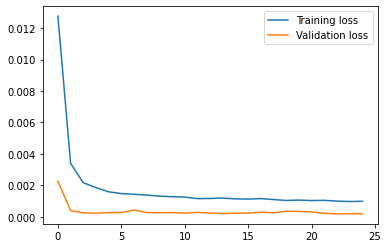

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(['Training loss','Validation loss'], loc='upper right')
plt.title = ('Model loss')
plt.xlabel = ('epochs')
plt.ylabel = ('Loss')
plt.show()

Lets try forecasting :

In [ ]:
training_dates

14     2003-01-23
16     2003-01-24
18     2003-01-25
20     2003-01-27
22     2003-01-28
          ...    
5625   2022-07-11
5626   2022-07-12
5627   2022-07-13
5628   2022-07-14
5629   2022-07-15
Name: date_arrival, Length: 5149, dtype: datetime64[ns]

In [ ]:
n_future = 30
future_dates = pd.date_range(list(training_dates)[-1], periods = n_future, freq='1d').tolist()
future_dates

[Timestamp('2022-07-15 00:00:00', freq='D'),
 Timestamp('2022-07-16 00:00:00', freq='D'),
 Timestamp('2022-07-17 00:00:00', freq='D'),
 Timestamp('2022-07-18 00:00:00', freq='D'),
 Timestamp('2022-07-19 00:00:00', freq='D'),
 Timestamp('2022-07-20 00:00:00', freq='D'),
 Timestamp('2022-07-21 00:00:00', freq='D'),
 Timestamp('2022-07-22 00:00:00', freq='D'),
 Timestamp('2022-07-23 00:00:00', freq='D'),
 Timestamp('2022-07-24 00:00:00', freq='D'),
 Timestamp('2022-07-25 00:00:00', freq='D'),
 Timestamp('2022-07-26 00:00:00', freq='D'),
 Timestamp('2022-07-27 00:00:00', freq='D'),
 Timestamp('2022-07-28 00:00:00', freq='D'),
 Timestamp('2022-07-29 00:00:00', freq='D'),
 Timestamp('2022-07-30 00:00:00', freq='D'),
 Timestamp('2022-07-31 00:00:00', freq='D'),
 Timestamp('2022-08-01 00:00:00', freq='D'),
 Timestamp('2022-08-02 00:00:00', freq='D'),
 Timestamp('2022-08-03 00:00:00', freq='D'),
 Timestamp('2022-08-04 00:00:00', freq='D'),
 Timestamp('2022-08-05 00:00:00', freq='D'),
 Timestamp

In [ ]:
forecast3 = model3.predict(train_X[-30:])
forecast3

array([[0.27492774],
       [0.27576572],
       [0.2764608 ],
       [0.27700043],
       [0.27727476],
       [0.2775196 ],
       [0.2779828 ],
       [0.27848405],
       [0.27905217],
       [0.27961758],
       [0.280284  ],
       [0.28104472],
       [0.28183824],
       [0.28252584],
       [0.2831106 ],
       [0.2834671 ],
       [0.28383774],
       [0.28425726],
       [0.28517404],
       [0.2865724 ],
       [0.28834426],
       [0.29020557],
       [0.29238766],
       [0.2948247 ],
       [0.2974059 ],
       [0.29982808],
       [0.30212665],
       [0.30461547],
       [0.30710903],
       [0.30942437]], dtype=float32)

In [ ]:
forecast3.shape

(30, 1)

In [ ]:
forecast_copy_cols = np.repeat(forecast3, data_for_training.shape[1],axis=-1)
forecast_copy_cols

array([[0.27492774, 0.27492774, 0.27492774, 0.27492774, 0.27492774,
        0.27492774, 0.27492774, 0.27492774, 0.27492774, 0.27492774,
        0.27492774, 0.27492774, 0.27492774],
       [0.27576572, 0.27576572, 0.27576572, 0.27576572, 0.27576572,
        0.27576572, 0.27576572, 0.27576572, 0.27576572, 0.27576572,
        0.27576572, 0.27576572, 0.27576572],
       [0.2764608 , 0.2764608 , 0.2764608 , 0.2764608 , 0.2764608 ,
        0.2764608 , 0.2764608 , 0.2764608 , 0.2764608 , 0.2764608 ,
        0.2764608 , 0.2764608 , 0.2764608 ],
       [0.27700043, 0.27700043, 0.27700043, 0.27700043, 0.27700043,
        0.27700043, 0.27700043, 0.27700043, 0.27700043, 0.27700043,
        0.27700043, 0.27700043, 0.27700043],
       [0.27727476, 0.27727476, 0.27727476, 0.27727476, 0.27727476,
        0.27727476, 0.27727476, 0.27727476, 0.27727476, 0.27727476,
        0.27727476, 0.27727476, 0.27727476],
       [0.2775196 , 0.2775196 , 0.2775196 , 0.2775196 , 0.2775196 ,
        0.2775196 , 0.27751

In [ ]:
df_train_to_val

,date_arrival,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG,Variety_Chandermukhi,Variety_Desi,Variety_Other,Variety_Potato,Variety_Red
14,2003-01-23,230.0,500.0,170.0,170,0.0,216.0,21.0,127,0,0,0,0,1
16,2003-01-24,170.0,500.0,160.0,160,0.0,249.0,45.0,171,0,0,0,0,1
18,2003-01-25,190.0,500.0,160.0,160,0.0,216.0,45.0,148,0,0,0,0,1
20,2003-01-27,130.0,500.0,160.0,160,0.0,287.0,104.0,198,0,0,0,0,1
22,2003-01-28,120.0,500.0,160.0,160,30.0,287.0,144.0,178,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,2022-07-11,90.0,1450.0,1550.0,1500,0.0,388.0,300.0,338,0,1,0,0,0
5626,2022-07-12,80.0,1480.0,1580.0,1530,0.0,388.0,302.0,335,0,1,0,0,0
5627,2022-07-13,60.0,1480.0,1590.0,1530,0.0,391.0,302.0,339,0,1,0,0,0
5628,2022-07-14,70.0,1480.0,1580.0,1530,0.0,396.0,302.0,336,0,1,0,0,0


In [ ]:
forecast_copy_cols.shape

(30, 13)

In [ ]:
y_pred_future_true =scaler.inverse_transform(forecast_copy_cols)[:,3]  
### slicing column check
y_pred_future_true

array([1319.6531, 1323.6754, 1327.0118, 1329.602 , 1330.9188, 1332.0941,
       1334.3175, 1336.7234, 1339.4504, 1342.1644, 1345.3632, 1349.0146,
       1352.8235, 1356.124 , 1358.9308, 1360.6421, 1362.4211, 1364.4348,
       1368.8354, 1375.5475, 1384.0525, 1392.9867, 1403.4608, 1415.1586,
       1427.5483, 1439.1748, 1450.2079, 1462.1543, 1474.1233, 1485.2369],
      dtype=float32)

In [ ]:
forecast_acc_dates =[]
for time_i in future_dates:
  forecast_acc_dates.append(time_i.date())

In [ ]:
df_forecast = pd.DataFrame({'date_arrival': np.array(forecast_acc_dates), 'MODAL(Per Q)':y_pred_future_true})
df_forecast['date_arrival']= pd.to_datetime(df_forecast['date_arrival'])
df_forecast

,date_arrival,MODAL(Per Q)
0,2022-07-15,1319.653076
1,2022-07-16,1323.675415
2,2022-07-17,1327.011841
3,2022-07-18,1329.602051
4,2022-07-19,1330.918823
5,2022-07-20,1332.094116
6,2022-07-21,1334.317505
7,2022-07-22,1336.723389
8,2022-07-23,1339.450439
9,2022-07-24,1342.164429


In [ ]:
df_train_to_val

,date_arrival,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG,Variety_Chandermukhi,Variety_Desi,Variety_Other,Variety_Potato,Variety_Red
14,2003-01-23,230.0,500.0,170.0,170,0.0,216.0,21.0,127,0,0,0,0,1
16,2003-01-24,170.0,500.0,160.0,160,0.0,249.0,45.0,171,0,0,0,0,1
18,2003-01-25,190.0,500.0,160.0,160,0.0,216.0,45.0,148,0,0,0,0,1
20,2003-01-27,130.0,500.0,160.0,160,0.0,287.0,104.0,198,0,0,0,0,1
22,2003-01-28,120.0,500.0,160.0,160,30.0,287.0,144.0,178,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,2022-07-11,90.0,1450.0,1550.0,1500,0.0,388.0,300.0,338,0,1,0,0,0
5626,2022-07-12,80.0,1480.0,1580.0,1530,0.0,388.0,302.0,335,0,1,0,0,0
5627,2022-07-13,60.0,1480.0,1590.0,1530,0.0,391.0,302.0,339,0,1,0,0,0
5628,2022-07-14,70.0,1480.0,1580.0,1530,0.0,396.0,302.0,336,0,1,0,0,0


In [ ]:
original = df_validate[['date_arrival','MODAL(Per Q)']]   

In [ ]:
original

,date_arrival,MODAL(Per Q)
5630,2022-07-16,1590
5631,2022-07-17,1580
5632,2022-07-18,1580
5633,2022-07-19,1580
5634,2022-07-20,1580
5635,2022-07-21,1590
5636,2022-07-22,1600
5637,2022-07-23,1610
5638,2022-07-24,1600
5639,2022-07-25,1610


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


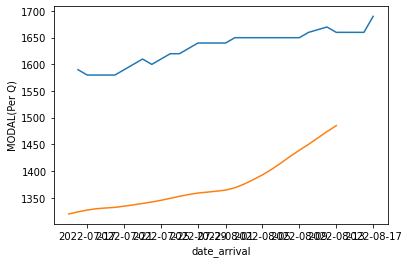

In [ ]:
sns.lineplot(original['date_arrival'], original['MODAL(Per Q)'])
sns.lineplot(df_forecast['date_arrival'], df_forecast['MODAL(Per Q)'])

from matplotlib import rcParams


Evaluation

In [ ]:
# rmse,mape,r2,accuracy

import math

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,median_absolute_error,explained_variance_score
mpe = mean_absolute_percentage_error(original['MODAL(Per Q)'] , df_forecast['MODAL(Per Q)'])
rmse = math.sqrt(mean_squared_error(original['MODAL(Per Q)'] , df_forecast['MODAL(Per Q)']))
mae = median_absolute_error(original['MODAL(Per Q)'] , df_forecast['MODAL(Per Q)'])
evs =explained_variance_score(original['MODAL(Per Q)'] , df_forecast['MODAL(Per Q)'])

print('The MPE is {}'.format(mpe))

print('The RSME is {}'.format(rmse))
print('The MAE is {}'.format(mae))
print('The EVS is {}'.format(evs))



## checking r2

from sklearn.metrics import r2_score
r2_score = r2_score(original['MODAL(Per Q)'] , df_forecast['MODAL(Per Q)'])
print('The r2 score is {}' .format(r2_score) )





The MPE is 0.15690364289464853
The RSME is 256.93969002990036
The MAE is 263.11602783203125
The EVS is 0.23856373504469508
The r2 score is -68.99199420590783


# CNN_LSTM

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder


In [ ]:
model4 = Sequential()
model4.add(Conv1D(filters=32, kernel_size=20, strides=2,padding="causal",activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model4.add(LSTM(128, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model4.add(LSTM(64, activation='relu',return_sequences=False))
model4.add(Dropout(0.2))
model4.add(Dense(train_Y.shape[1]))

In [ ]:
model4.compile(optimizer =Adam(learning_rate=0.0001), loss='mse',metrics='acc') 

In [ ]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15, 32)            8352      
                                                                 
 lstm_2 (LSTM)               (None, 15, 128)           82432     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 140,257
Trainable params: 140,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history4 = model4.fit(train_X, train_Y, epochs=25, batch_size=30, validation_split=0.1, verbose=1)

Epoch 1/25
154/154 [==============================] - 8s 32ms/step - loss: 0.0078 - acc: 2.1706e-04 - val_loss: 9.2418e-04 - val_acc: 0.0000e+00
Epoch 2/25
154/154 [==============================] - 4s 28ms/step - loss: 0.0024 - acc: 2.1706e-04 - val_loss: 6.9767e-04 - val_acc: 0.0000e+00
Epoch 3/25
154/154 [==============================] - 4s 29ms/step - loss: 0.0022 - acc: 2.1706e-04 - val_loss: 8.1122e-04 - val_acc: 0.0000e+00
Epoch 4/25
154/154 [==============================] - 4s 28ms/step - loss: 0.0020 - acc: 2.1706e-04 - val_loss: 7.9602e-04 - val_acc: 0.0000e+00
Epoch 5/25
154/154 [==============================] - 4s 28ms/step - loss: 0.0018 - acc: 2.1706e-04 - val_loss: 7.2973e-04 - val_acc: 0.0000e+00
Epoch 6/25
154/154 [==============================] - 4s 28ms/step - loss: 0.0018 - acc: 2.1706e-04 - val_loss: 7.2456e-04 - val_acc: 0.0000e+00
Epoch 7/25
154/154 [==============================] - 4s 28ms/step - loss: 0.0016 - acc: 2.1706e-04 - val_loss: 6.3853e-04 - val_a

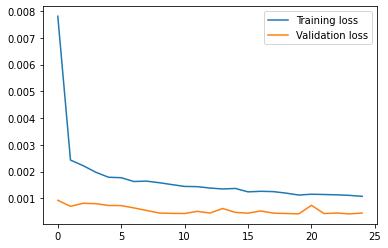

In [ ]:
plt.plot(history4.history['loss'], label='Training loss')
plt.plot(history4.history['val_loss'], label='Validation loss')
plt.legend(['Training loss','Validation loss'], loc='upper right')
plt.title = ('Model loss')
plt.xlabel = ('epochs')
plt.ylabel = ('Loss')
plt.show()

In [ ]:
n_future = 30
future_dates = pd.date_range(list(training_dates)[-1], periods = n_future, freq='1d').tolist()
future_dates

[Timestamp('2022-07-15 00:00:00', freq='D'),
 Timestamp('2022-07-16 00:00:00', freq='D'),
 Timestamp('2022-07-17 00:00:00', freq='D'),
 Timestamp('2022-07-18 00:00:00', freq='D'),
 Timestamp('2022-07-19 00:00:00', freq='D'),
 Timestamp('2022-07-20 00:00:00', freq='D'),
 Timestamp('2022-07-21 00:00:00', freq='D'),
 Timestamp('2022-07-22 00:00:00', freq='D'),
 Timestamp('2022-07-23 00:00:00', freq='D'),
 Timestamp('2022-07-24 00:00:00', freq='D'),
 Timestamp('2022-07-25 00:00:00', freq='D'),
 Timestamp('2022-07-26 00:00:00', freq='D'),
 Timestamp('2022-07-27 00:00:00', freq='D'),
 Timestamp('2022-07-28 00:00:00', freq='D'),
 Timestamp('2022-07-29 00:00:00', freq='D'),
 Timestamp('2022-07-30 00:00:00', freq='D'),
 Timestamp('2022-07-31 00:00:00', freq='D'),
 Timestamp('2022-08-01 00:00:00', freq='D'),
 Timestamp('2022-08-02 00:00:00', freq='D'),
 Timestamp('2022-08-03 00:00:00', freq='D'),
 Timestamp('2022-08-04 00:00:00', freq='D'),
 Timestamp('2022-08-05 00:00:00', freq='D'),
 Timestamp

Fitting the CNN-LSTM model

In [ ]:
forecast4 = model4.predict(train_X[-30:])
forecast4

array([[0.27916807],
       [0.28238234],
       [0.28616017],
       [0.29050705],
       [0.29122534],
       [0.29454365],
       [0.29259235],
       [0.29588476],
       [0.29600707],
       [0.29833898],
       [0.2973385 ],
       [0.29803732],
       [0.29790294],
       [0.29806715],
       [0.29738694],
       [0.29620445],
       [0.29466388],
       [0.29329738],
       [0.2911308 ],
       [0.29017407],
       [0.28864396],
       [0.28628683],
       [0.28600806],
       [0.28338724],
       [0.28722334],
       [0.2838004 ],
       [0.28877383],
       [0.28749824],
       [0.29320955],
       [0.29357308]], dtype=float32)

In [ ]:
forecast4.shape

(30, 1)

In [ ]:
forecast_copy_cols4 = np.repeat(forecast4, data_for_training.shape[1],axis=-1)
forecast_copy_cols4


array([[0.27916807, 0.27916807, 0.27916807, 0.27916807, 0.27916807,
        0.27916807, 0.27916807, 0.27916807, 0.27916807, 0.27916807,
        0.27916807, 0.27916807, 0.27916807],
       [0.28238234, 0.28238234, 0.28238234, 0.28238234, 0.28238234,
        0.28238234, 0.28238234, 0.28238234, 0.28238234, 0.28238234,
        0.28238234, 0.28238234, 0.28238234],
       [0.28616017, 0.28616017, 0.28616017, 0.28616017, 0.28616017,
        0.28616017, 0.28616017, 0.28616017, 0.28616017, 0.28616017,
        0.28616017, 0.28616017, 0.28616017],
       [0.29050705, 0.29050705, 0.29050705, 0.29050705, 0.29050705,
        0.29050705, 0.29050705, 0.29050705, 0.29050705, 0.29050705,
        0.29050705, 0.29050705, 0.29050705],
       [0.29122534, 0.29122534, 0.29122534, 0.29122534, 0.29122534,
        0.29122534, 0.29122534, 0.29122534, 0.29122534, 0.29122534,
        0.29122534, 0.29122534, 0.29122534],
       [0.29454365, 0.29454365, 0.29454365, 0.29454365, 0.29454365,
        0.29454365, 0.29454

In [ ]:
df_train_to_val

,date_arrival,Arrival(Tonnes),MIN,MAX,MODAL(Per Q),PRCP,TMAX,TMIN,TAVG,Variety_Chandermukhi,Variety_Desi,Variety_Other,Variety_Potato,Variety_Red
14,2003-01-23,230.0,500.0,170.0,170,0.0,216.0,21.0,127,0,0,0,0,1
16,2003-01-24,170.0,500.0,160.0,160,0.0,249.0,45.0,171,0,0,0,0,1
18,2003-01-25,190.0,500.0,160.0,160,0.0,216.0,45.0,148,0,0,0,0,1
20,2003-01-27,130.0,500.0,160.0,160,0.0,287.0,104.0,198,0,0,0,0,1
22,2003-01-28,120.0,500.0,160.0,160,30.0,287.0,144.0,178,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,2022-07-11,90.0,1450.0,1550.0,1500,0.0,388.0,300.0,338,0,1,0,0,0
5626,2022-07-12,80.0,1480.0,1580.0,1530,0.0,388.0,302.0,335,0,1,0,0,0
5627,2022-07-13,60.0,1480.0,1590.0,1530,0.0,391.0,302.0,339,0,1,0,0,0
5628,2022-07-14,70.0,1480.0,1580.0,1530,0.0,396.0,302.0,336,0,1,0,0,0


In [ ]:
y_pred_future_true4 =scaler.inverse_transform(forecast_copy_cols4)[:,3]  
### slicing column check
y_pred_future_true4

array([1340.0067, 1355.4352, 1373.5688, 1394.4338, 1397.8816, 1413.8096,
       1404.4432, 1420.2468, 1420.8339, 1432.0271, 1427.2247, 1430.5791,
       1429.9341, 1430.7223, 1427.4573, 1421.7814, 1414.3866, 1407.8274,
       1397.4279, 1392.8356, 1385.491 , 1374.1768, 1372.8387, 1360.2588,
       1378.672 , 1362.242 , 1386.1144, 1379.9916, 1407.4059, 1409.1508],
      dtype=float32)

In [ ]:
df_forecast4 = pd.DataFrame({'date_arrival': np.array(forecast_acc_dates), 'MODAL(Per Q)':y_pred_future_true4})
df_forecast4['date_arrival']= pd.to_datetime(df_forecast4['date_arrival'])
df_forecast4


,date_arrival,MODAL(Per Q)
0,2022-07-15,1340.006714
1,2022-07-16,1355.435181
2,2022-07-17,1373.568848
3,2022-07-18,1394.433838
4,2022-07-19,1397.881592
5,2022-07-20,1413.809570
6,2022-07-21,1404.443237
7,2022-07-22,1420.246826
8,2022-07-23,1420.833862
9,2022-07-24,1432.027100


In [ ]:
original4 = df_validate[['date_arrival','MODAL(Per Q)']]   #df2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


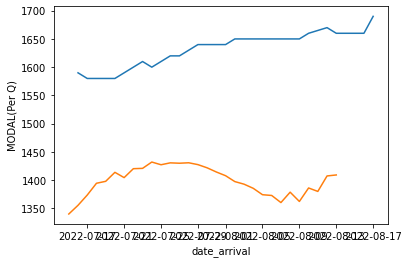

In [ ]:
import seaborn as sns

sns.lineplot(original4['date_arrival'], original4['MODAL(Per Q)'])
sns.lineplot(df_forecast4['date_arrival'], df_forecast4['MODAL(Per Q)'])

In [ ]:
# rmse,mape,r2,accuracy

import math

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,median_absolute_error,explained_variance_score
mpe = mean_absolute_percentage_error(original4['MODAL(Per Q)'] , df_forecast4['MODAL(Per Q)'])
rmse = math.sqrt(mean_squared_error(original4['MODAL(Per Q)'] , df_forecast4['MODAL(Per Q)']))
mae = median_absolute_error(original4['MODAL(Per Q)'] , df_forecast4['MODAL(Per Q)'])
evs =explained_variance_score(original4['MODAL(Per Q)'] , df_forecast4['MODAL(Per Q)'])

print('The MPE is {}'.format(mpe))

print('The RSME is {}'.format(rmse))
print('The MAE is {}'.format(mae))
print('The EVS is {}'.format(evs))



## checking r2

from sklearn.metrics import r2_score
r2_score = r2_score(original4['MODAL(Per Q)'] , df_forecast4['MODAL(Per Q)'])
print('The r2 score is {}' .format(r2_score) )





The MPE is 0.14201327919338963
The RSME is 235.42346024103057
The MAE is 230.089111328125
The EVS is -0.6834912539140001
The r2 score is -57.76049601681479
